<a href="https://colab.research.google.com/github/sezinbiner/ClassificationOfCovidXray/blob/main/feature_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_dir = "/content/gdrive/MyDrive/bitirme dataset/train"
test_dir = "/content/gdrive/MyDrive/bitirme dataset/test"
validation_dir = "/content/gdrive/MyDrive/bitirme dataset/validation"
class_names = ['covid', 'normal']
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),  
        batch_size=20,
        shuffle=True,
        class_mode='binary')
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        shuffle=True,
        class_mode='binary')
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=1,
        class_mode='binary')

Found 4800 images belonging to 2 classes.
Found 1200 images belonging to 2 classes.
Found 1232 images belonging to 2 classes.


In [2]:
def extract_features(number_of_images, generator, batch_size):
  features = np.zeros(shape=(number_of_images, 7, 7, 512))
  labels = np.zeros(shape=(number_of_images))
  i = 0
  print("loop")
  for inputs_batch, labels_batch in generator:
      features_batch = extraction_layer.predict(inputs_batch)
      features[i * batch_size : (i + 1) * batch_size] = features_batch
      labels[i * batch_size : (i + 1) * batch_size] = labels_batch
      i += 1
      if i * batch_size >= number_of_images:
          break
  print("loop over")
  return features, labels

In [8]:
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
import numpy as np

extraction_layer = VGG16(weights='imagenet', include_top=False)
extraction_layer.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
______________________________________________________________

In [ ]:
train_features, train_labels = extract_features(4800, train_generator, 20)
validation_features, validation_labels = extract_features(1200, validation_generator, 20)

loop


KeyboardInterrupt: ignored

In [ ]:
from keras.models import Sequential
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(
    loss='binary_crossentropy',
    optimizer= "adam" ,
    metrics=['accuracy']
)

In [3]:
history = model.fit(train_features, train_labels,
                    epochs=3,
                    batch_size=16,
                    validation_data=(validation_features, validation_labels))

NameError: ignored

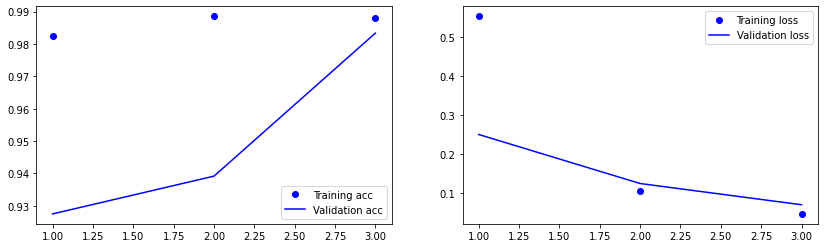

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

f, axes = plt.subplots(1,2,figsize=(14,4))

axes[0].plot(epochs, acc, 'bo', label='Training acc')
axes[0].plot(epochs, val_acc, 'b', label='Validation acc')
axes[0].legend()

axes[1].plot(epochs, loss, 'bo', label='Training loss')
axes[1].plot(epochs, val_loss, 'b', label='Validation loss')
axes[1].yaxis.set_label_position("right")
axes[1].legend()

plt.show()

In [ ]:
import tensorflow as tf
y_pred=model.predict_classes(validation_features)
from sklearn.metrics import confusion_matrix
confusion_matrix(validation_labels, y_pred)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1082,   14],
       [   6,   98]])

In [1]:
test_features, test_labels = extract_features(1232, test_generator, 20)

NameError: ignored

In [ ]:
result = np.where(test_labels == 0)
print(len(result[0]))

432


In [ ]:
from sklearn import metrics
y_pred = model.predict(test_features)
probas = np.array(y_pred)
labels = []
for prob in probas:
  if prob < 0.5:
    labels.append(0)
  else:
    labels.append(1)
y_true_labels = test_labels
y_pred_labels = labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_true_labels, y_pred_labels)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_true_labels, y_pred_labels,pos_label='positive', average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_true_labels, y_pred_labels, average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')
print('F1 score: %f' % f1)
from sklearn.metrics import classification_report
print(classification_report(y_true_labels, y_pred_labels, target_names=["covid", "normal"]))
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true_labels, y_pred_labels)

Accuracy: 0.870130
Precision: 0.870130
Recall: 0.870130
F1 score: 0.866596
              precision    recall  f1-score   support

       covid       0.89      0.72      0.80       432
      normal       0.86      0.95      0.90       800

    accuracy                           0.87      1232
   macro avg       0.88      0.84      0.85      1232
weighted avg       0.87      0.87      0.87      1232



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


array([[312, 120],
       [ 40, 760]])